OBJECTIVE

Develop a fraud detection system to identify fraudulent credit card transactions using 
Machine Learning. This project involves data preprocessing, exploratory data analysis, feature 
engineering, model training, and evaluation.

ABOUT THE DATA

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Unfortunately, due to confidentiality issues, we cannot use the original features and more background information about the data.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd

Step 1: Data Understanding & Preprocessing

In [2]:
#loading the datasets
data = pd.read_csv("creditcard.csv")

In [3]:
data = pd.DataFrame(data)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.options.display.max_columns = None    #to expand all the columns

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#to retrieve no. of rows and columns
data.shape 

(284807, 31)

In [7]:
#to check if there is any duplicate value in our Datasets
data.duplicated().any()

np.True_

In [8]:
#to remove those duplicated values
data = data.drop_duplicates()
data.shape

(283726, 31)

In [9]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [10]:
#conclusion: no null value exist in our data and datatype for all is float except Class 
#Class is dependent Variable or target variable(ML model to predict)
#this is a Supervised Classification Problem

In [11]:
class_counts = data["Class"].value_counts()
class_counts

Class
0    283253
1       473
Name: count, dtype: int64

In [12]:
#The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [13]:
#Feature scaling: 
#The dataset is already PCA-transformed, but applying StandardScaler to Amount

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data["Amount"] = sc.fit_transform(data[["Amount"]])


In [14]:
#removing the not required column

data = data.drop(['Time'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [15]:
#now we have cleaned the data and completed the first step of Data Preprocessing

Step 2: Exploratory Data Analysis (EDA)

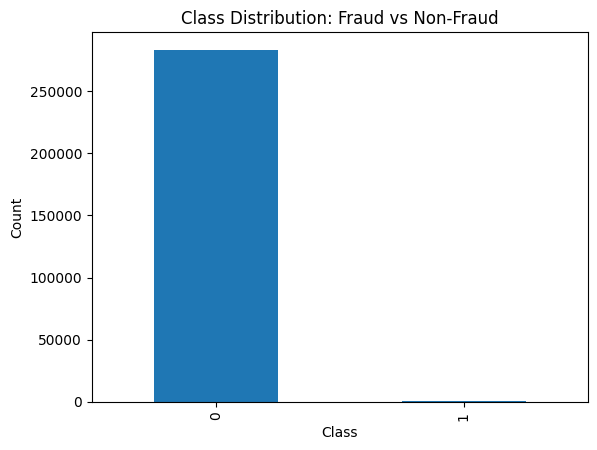

In [16]:
#Checking class imbalance (fraudulent vs. non-fraudulent transactions)

import matplotlib.pyplot as plt
import seaborn as sns

class_counts = data["Class"].value_counts()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()



In [17]:
#print percentages
print(data['Class'].value_counts(normalize=True) * 100)


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


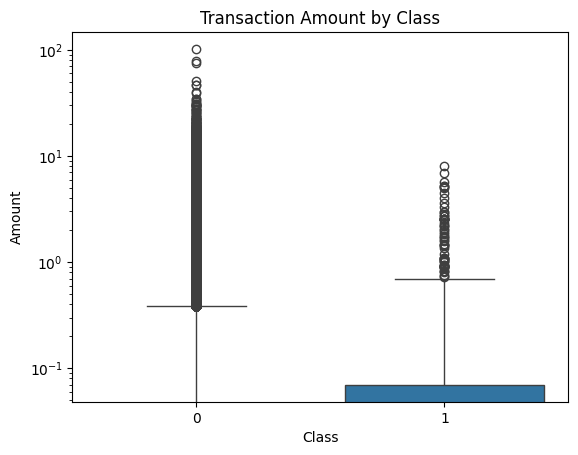

In [22]:
#Compare transaction amounts between fraud(1) and non-fraud(0) cases.

sns.boxplot(x= 'Class', y = 'Amount', data= data)
plt.title("Transaction Amount by Class")
plt.yscale('log')
plt.show()

"Correlation Heatmap"

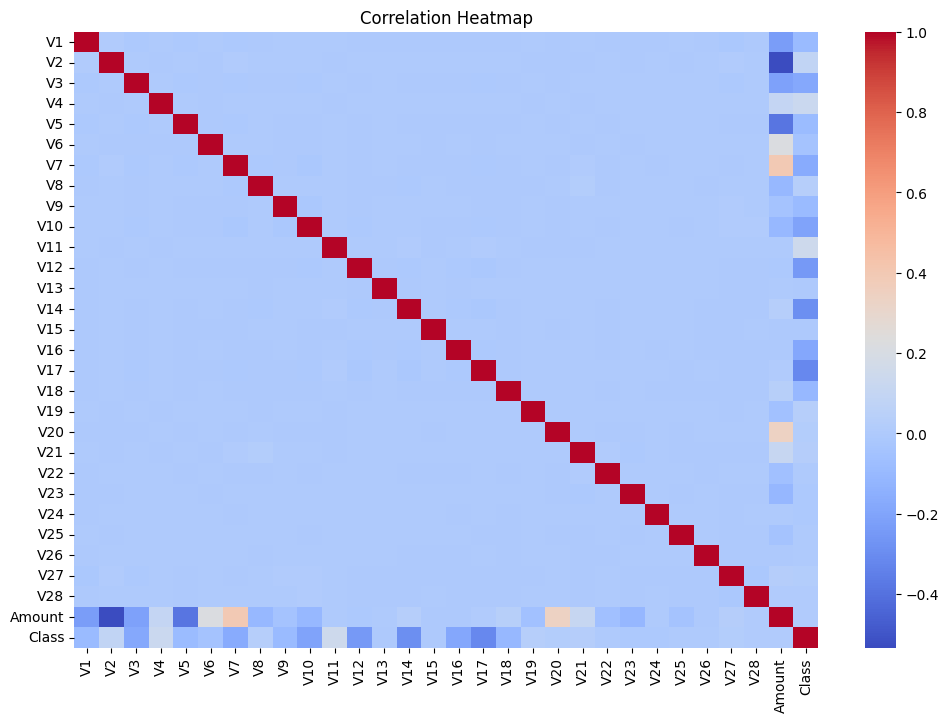

In [19]:
#This reveals relationships between numerical features.

corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Feature Distribution

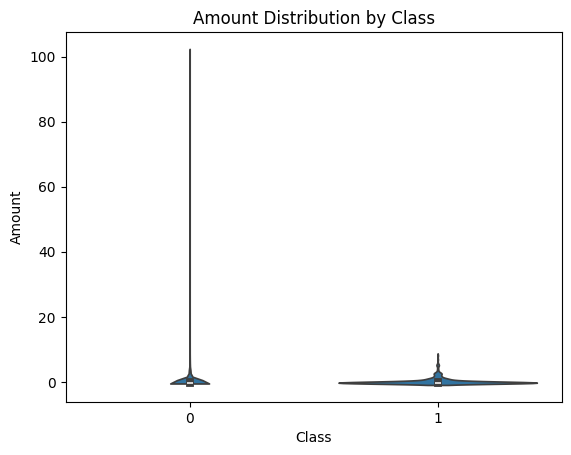

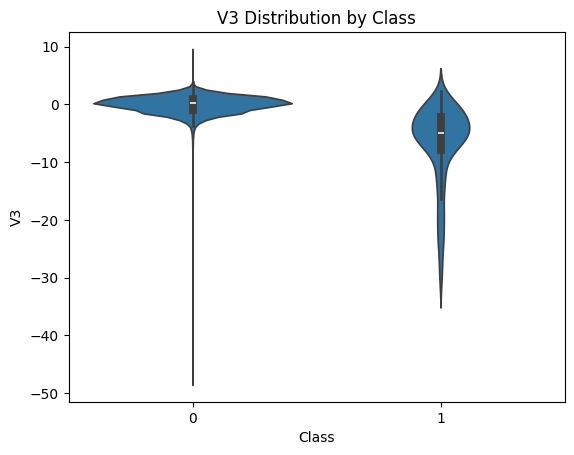

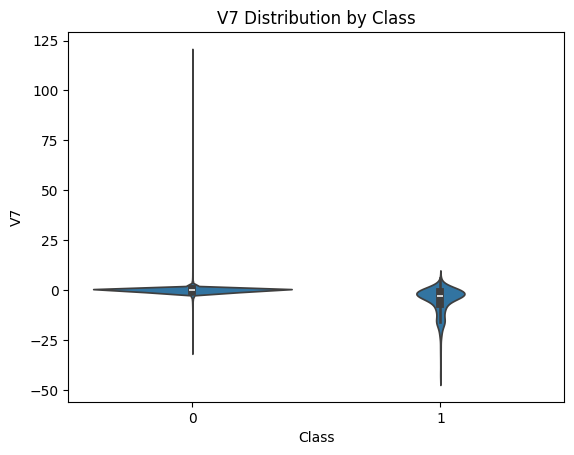

In [25]:
features = ['Amount', 'V3','V7']  # Add more relevant features here

for feature in features:
    sns.violinplot(x='Class', y=feature, data=data)
    plt.title(f'{feature} Distribution by Class')
    plt.show()

Step 3: Feature Engineering 

In [30]:
#Feature selection using Recursive Feature Elimination (RFE).
#Recursive Feature Elimination (RFE) is a powerful technique to select the most important features by recursively removing the least significant ones. 
#import library

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#  Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create and fit the RFE model
lr = LogisticRegression(max_iter=1000)        # maximum number of iterations
selector = RFE(lr, n_features_to_select=10)  # Choose how many top features you want
selector = selector.fit(X_train, y_train)

#  Get selected features
selected_features = X.columns[selector.support_]
print("Top selected features:")
print(selected_features)


Top selected features:
Index(['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V25', 'V27'], dtype='object')


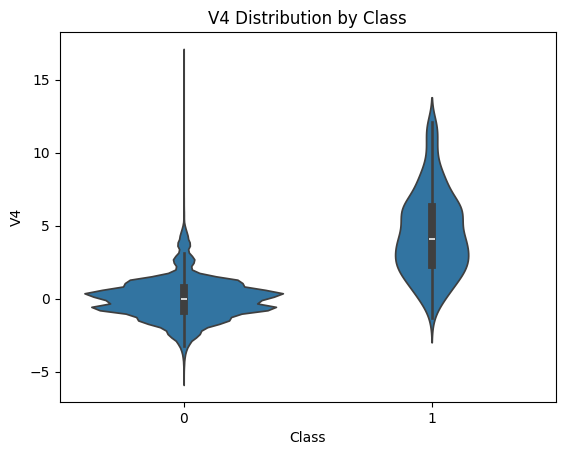

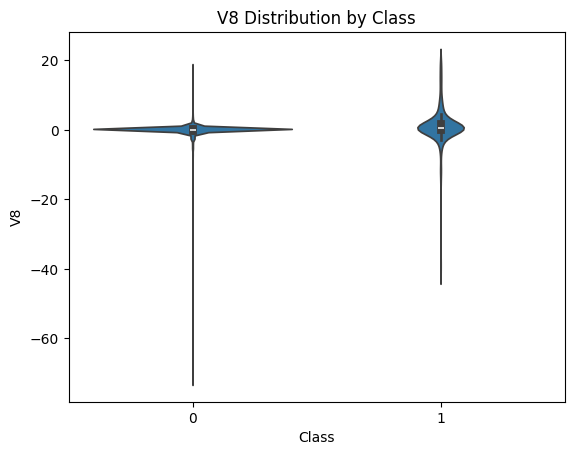

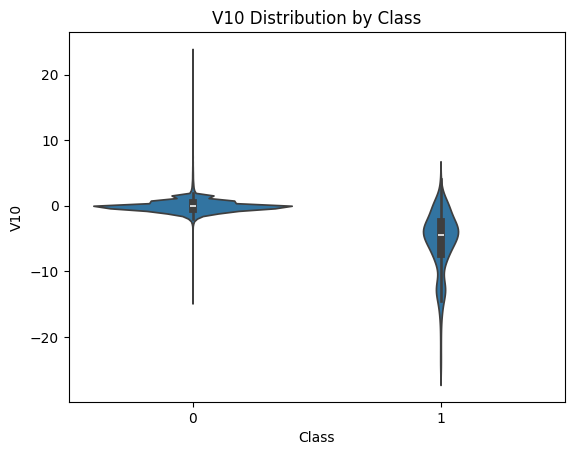

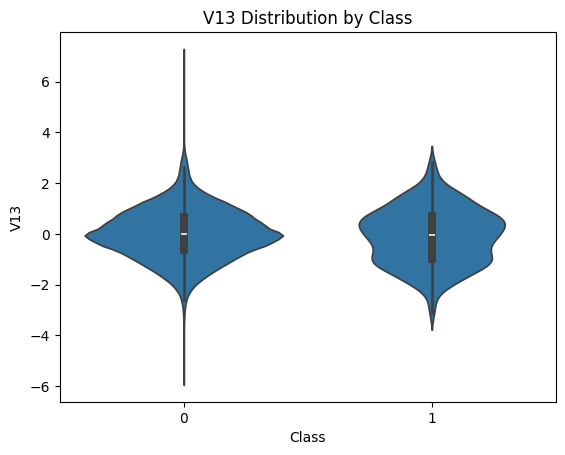

In [31]:
features = ['V4', 'V8', 'V10', 'V13']  # Add more relevant features here

for feature in features:
    sns.violinplot(x='Class', y=feature, data=data)
    plt.title(f'{feature} Distribution by Class')
    plt.show()

In [33]:
#Remove redundant or less relevant features based on EDA. 

## Keep only the features RFE selected
X_rfe = X.loc[:, selector.support_]
X_rfe.columns

Index(['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V25', 'V27'], dtype='object')

Step 4: Model Building & Training 

In [35]:
#Split the data

from sklearn.model_selection import train_test_split
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

In [42]:
#importing the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


In [44]:
#train multiple models


classifier = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n============={name}===========")
    clf.fit(X_rfe_train, y_train)
    y_pred = clf.predict(X_rfe_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")    # model evaluation
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1: {f1_score(y_test, y_pred)}")
    print(f"\n Confusion_matrix \n: {confusion_matrix(y_test, y_pred)}")
    


=============Logistic Regression===========

 Accuracy: 0.9991365030134283

 Precision: 0.8867924528301887

 Recall: 0.5222222222222223

 F1: 0.6573426573426573

 Confusion_matrix 
: [[56650     6]
 [   43    47]]

=============Random Forest Classifier===========

 Accuracy: 0.9995065731505305

 Precision: 0.984375

 Recall: 0.7

 F1: 0.8181818181818182

 Confusion_matrix 
: [[56655     1]
 [   27    63]]

=============Decision Tree Classifier===========

 Accuracy: 0.9993127268882388

 Precision: 0.8695652173913043

 Recall: 0.6666666666666666

 F1: 0.7547169811320755

 Confusion_matrix 
: [[56647     9]
 [   30    60]]


Step 5: Model Evaluation 

Best Model Based on Precision-Recall Tradeoff:

Random Forest Classifier stands out. It captures a high proportion of frauds (70% recall) while keeping false positives very low (98% precision).

STEP 6: Handling imbalanced data

Undersampling Method

Class
1    473
0    473
Name: count, dtype: int64


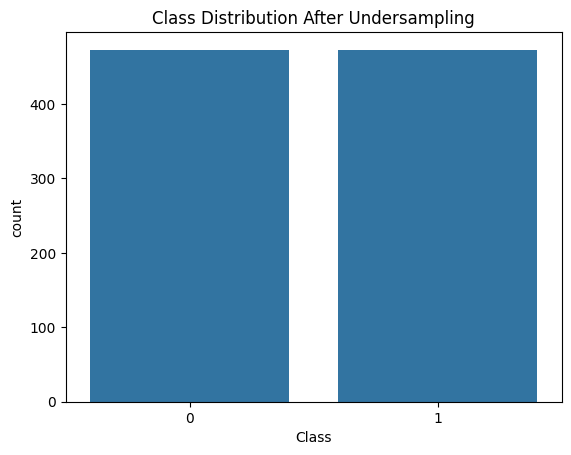

In [45]:
# Separate fraud and non-fraud transactions
data_fraud = data[data["Class"] == 1]  # Fraud cases
data_non_fraud = data[data["Class"] == 0]  # Non-fraud cases

# Perform undersampling
data_non_fraud_undersampled = data_non_fraud.sample(n=len(data_fraud), random_state=42)

# Combine undersampled data
data_balanced = pd.concat([data_fraud, data_non_fraud_undersampled], axis=0)

# Check new distribution
print(data_balanced["Class"].value_counts())
sns.countplot(x="Class", data=data_balanced)
plt.title("Class Distribution After Undersampling")
plt.show()

In [47]:
#split data for modeling

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_balanced.drop("Class", axis=1)
y = data_balanced["Class"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (662, 29)
Test data size: (284, 29)


In [48]:
#Apply RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize model
model = LogisticRegression(max_iter=1000)

# Apply RFE (selecting top 10 features)
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

# Keep only selected features
X_train_rfe = X_train.loc[:, selector.support_]
X_test_rfe = X_test.loc[:, selector.support_]

print("Selected Features:", X_train_rfe.columns)

Selected Features: Index(['V4', 'V6', 'V8', 'V10', 'V11', 'V12', 'V14', 'V22', 'V26', 'V28'], dtype='object')


In [50]:
#train and compare classifier
from sklearn.metrics import accuracy_score, classification_report

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate models
for name, clf in classifiers.items():
    print(f"\n============ {name} ===========")
    clf.fit(X_train_rfe, y_train)
    y_pred = clf.predict(X_test_rfe)

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


============ Logistic Regression ===========
Accuracy: 0.9647887323943662
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       144
           1       0.99      0.94      0.96       140

    accuracy                           0.96       284
   macro avg       0.97      0.96      0.96       284
weighted avg       0.97      0.96      0.96       284


============ Random Forest ===========
Accuracy: 0.9612676056338029
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       144
           1       0.98      0.94      0.96       140

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284


============ Decision Tree ===========
Accuracy: 0.9119718309859155
Classification Report:
               precision    recall  f1-score   support

      

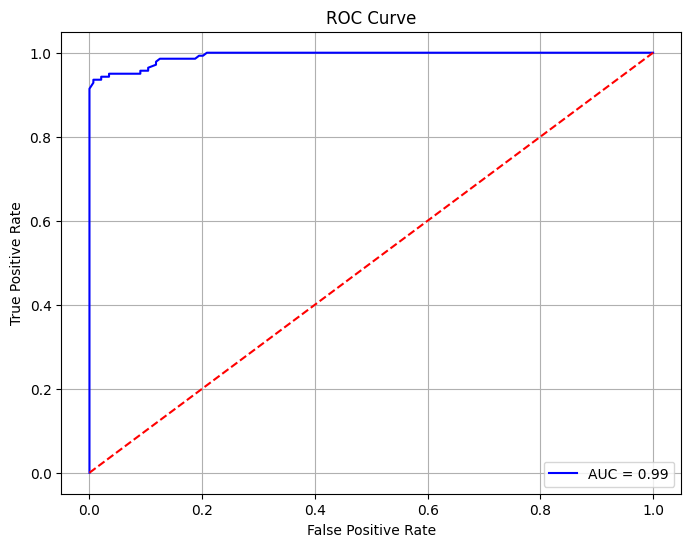

In [51]:
#evaluate model effectively

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for Random Forest (best performer)
y_probs = classifiers["Random Forest"].predict_proba(X_test_rfe)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()